# Exercise 3-1: Create some plots

In [8]:
import pandas as pd

## Get the data

In [11]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [13]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

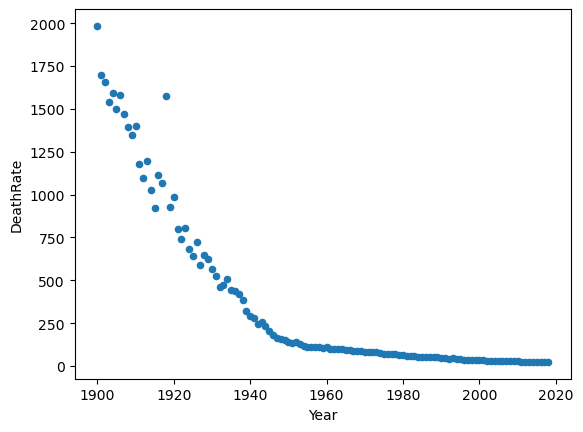

In [16]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

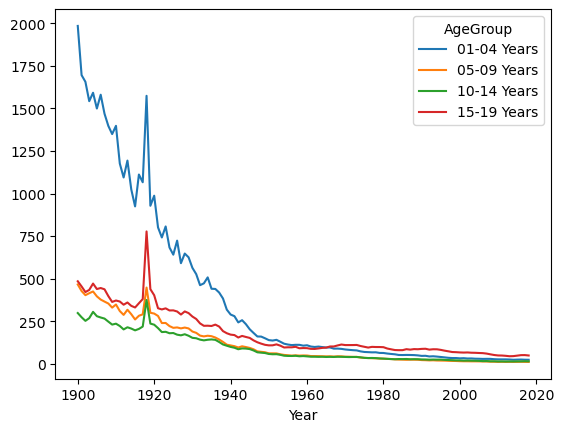

In [18]:
mortality_wide.plot()

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 

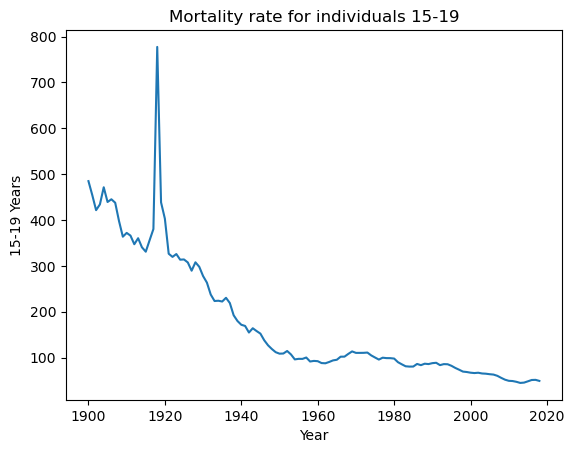

In [22]:
sns.lineplot( x="Year", y="15-19 Years", data = mortality_wide, legend = False, ).set_title('Mortality rate for individuals 15-19')
plt.show()

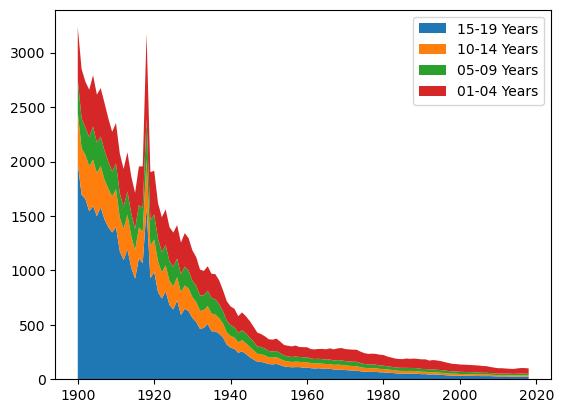

In [24]:
data = mortality_wide
df = pd.DataFrame(data) 
df = mortality_wide.reset_index(names='Year')

plt.stackplot(df['Year'], df['01-04 Years'], df['05-09 Years'], df['10-14 Years'], df['15-19 Years'],
              labels=['01-04 Years', '05-09 Years', '10-14 Years', '15-19 Years'])  
plt.legend(loc='upper right', labels=['15-19 Years', '10-14 Years', '05-09 Years', '01-04 Years'])  
plt.show()

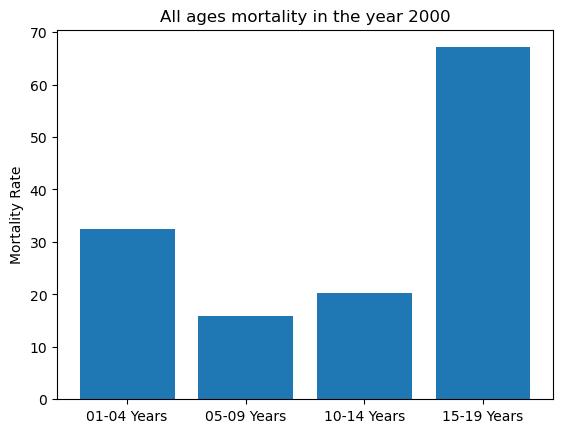

In [26]:
data = mortality_wide
df = pd.DataFrame(data) 
plt.bar(df.columns, df.loc[2000]) 
plt.title("All ages mortality in the year 2000")  
plt.ylabel("Mortality Rate")  
plt.xlabel("") 
plt.show()

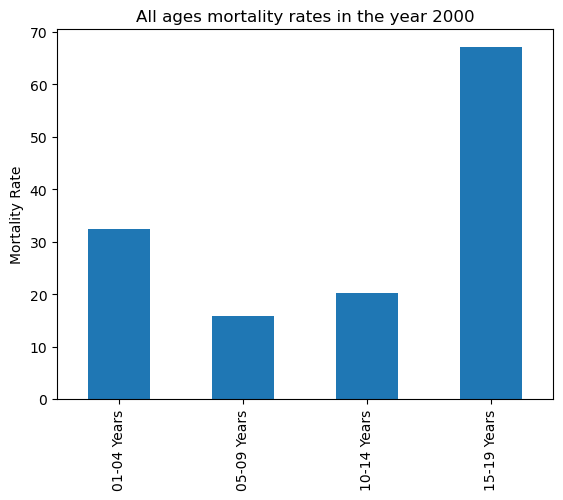

In [28]:
mortality_data.query("Year == 2000").pivot(index="AgeGroup", columns="Year", 
                         values="DeathRate").plot(kind="bar",
                                                 title="All ages mortality rates in the year 2000", legend= False)
plt.ylabel("Mortality Rate")
plt.xlabel("") 
plt.show()


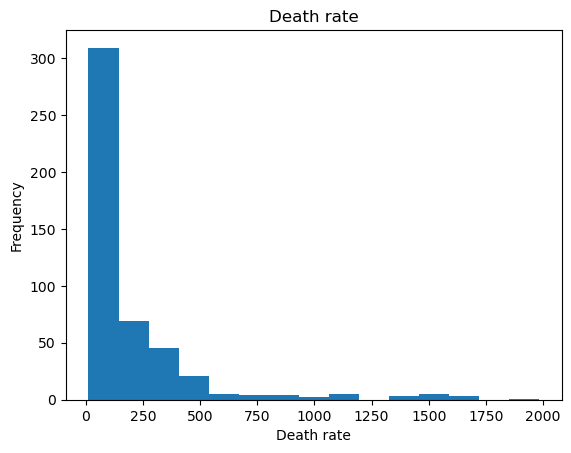

In [30]:
df = mortality_data[['DeathRate']]
plt.hist(df['DeathRate'], bins=15)
plt.title("Death rate")
plt.xlabel("Death rate")
plt.ylabel("Frequency")
plt.show()

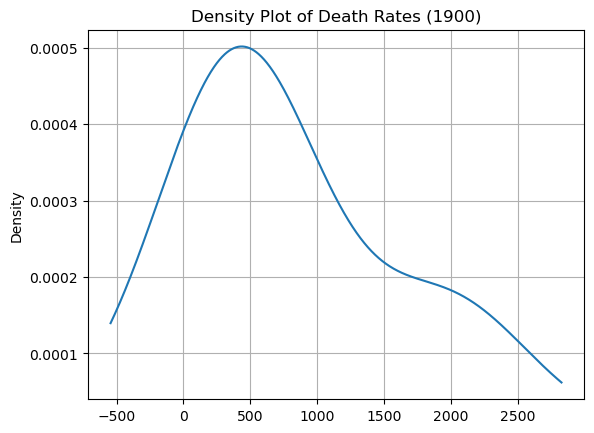

In [32]:
mortality_data.query("Year == 1900")['DeathRate'].plot(kind='density', 
                    title="Density Plot of Death Rates (1900)", grid=True)
plt.show()


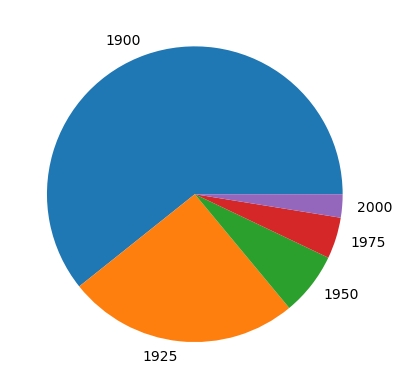

In [34]:
mortality_data.query("Year in [1900, 1925, 1950, 1975, 2000]").groupby("Year")["DeathRate"].sum().plot(kind="pie")
plt.ylabel('')
plt.show()


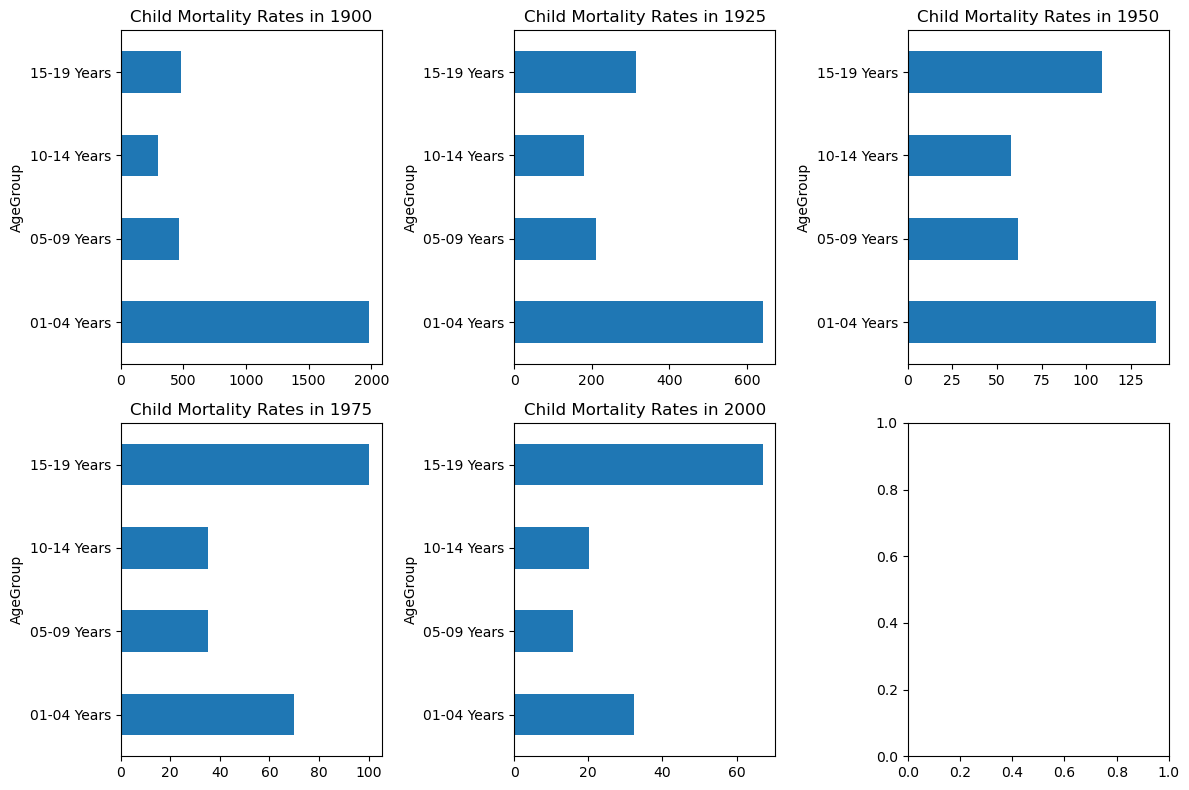

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

years = [1900, 1925, 1950, 1975, 2000]
for ax, year in zip(axes.flatten(), years):
    mortality_data.query(f"Year == {year} and AgeGroup in ['01-04 Years', '05-09 Years', '10-14 Years', '15-19 Years']").pivot(index="AgeGroup", 
                 columns="Year", values="DeathRate").plot(kind='barh', ax=ax, legend=False)
    ax.set_title(f"Child Mortality Rates in {year}")

plt.tight_layout()
plt.show()

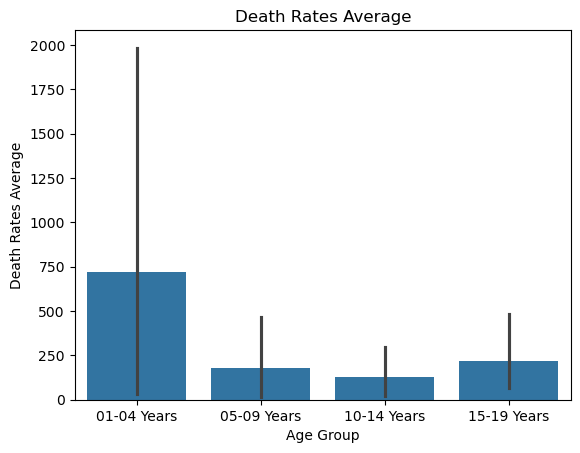

In [61]:
df_years = df[(df['Year'] == 1900) | (df['Year'] == 1950) | (df['Year'] == 2000)]
sns.barplot(x='AgeGroup', y='DeathRate', data=df_years)
plt.title('Death Rates Average')
plt.xlabel('Age Group')
plt.ylabel('Death Rates Average')
plt.show()

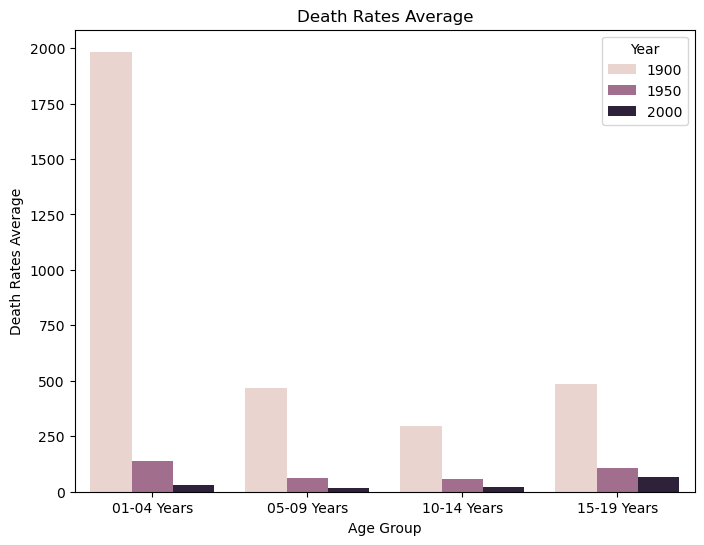

In [65]:
df_years = df[(df['Year'] == 1900) | (df['Year'] == 1950) | (df['Year'] == 2000)]
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='DeathRate', data=df_years, hue='Year')
plt.title('Death Rates Average')
plt.xlabel('Age Group')
plt.ylabel('Death Rates Average')
plt.show()

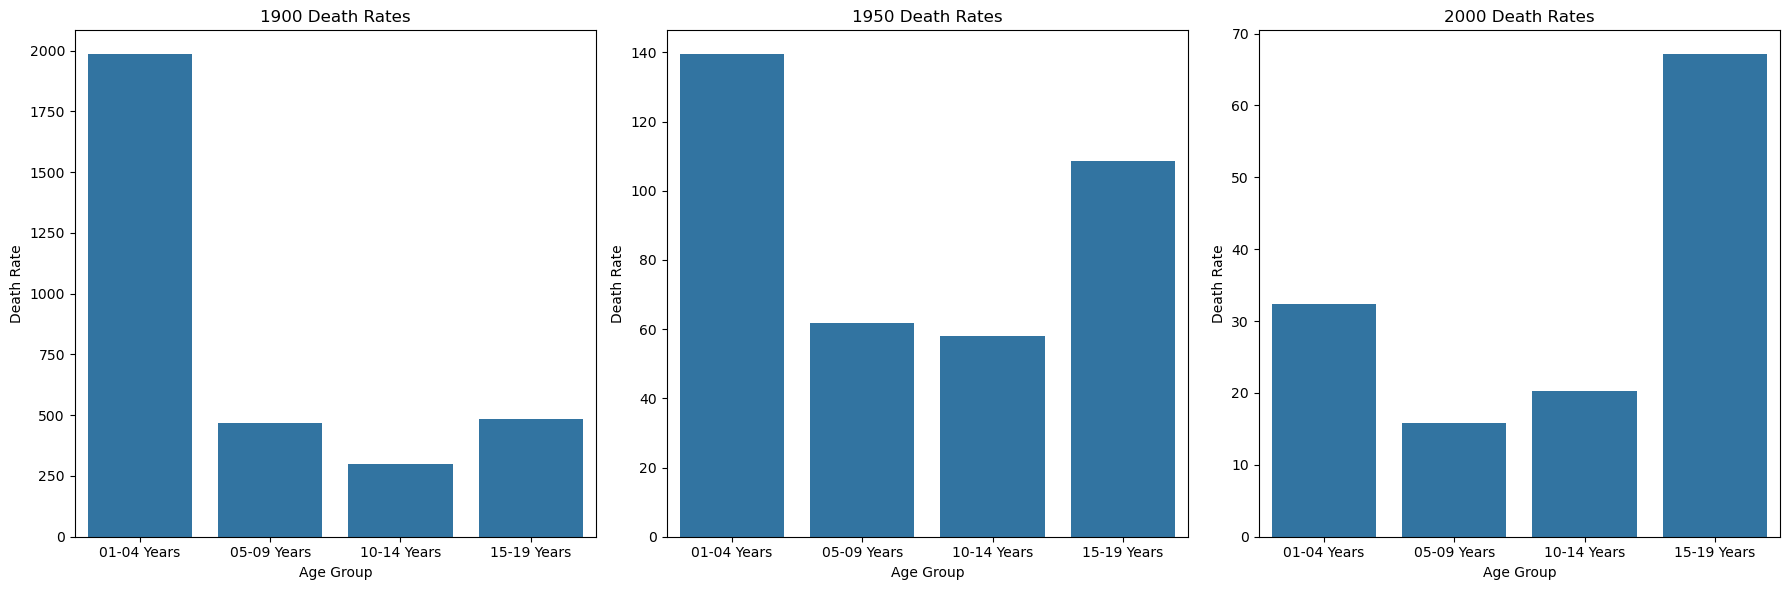

In [71]:
df = mortality_data[['Year', 'AgeGroup', 'DeathRate']]
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

sns.barplot(data=df[df["Year"] == 1900], x="AgeGroup", y="DeathRate", ax=axes[0])
axes[0].set_title("1900 Death Rates")  
axes[0].set_xlabel("Age Group")  
axes[0].set_ylabel("Death Rate")  

sns.barplot(data=df[df["Year"] == 1950], x="AgeGroup", y="DeathRate", ax=axes[1])
axes[1].set_title("1950 Death Rates")  
axes[1].set_xlabel("Age Group")  
axes[1].set_ylabel("Death Rate") 

sns.barplot(data=df[df["Year"] == 2000], x="AgeGroup", y="DeathRate", ax=axes[2])
axes[2].set_title("2000 Death Rates") 
axes[2].set_xlabel("Age Group")  
axes[2].set_ylabel("Death Rate")  

plt.tight_layout()
plt.show()

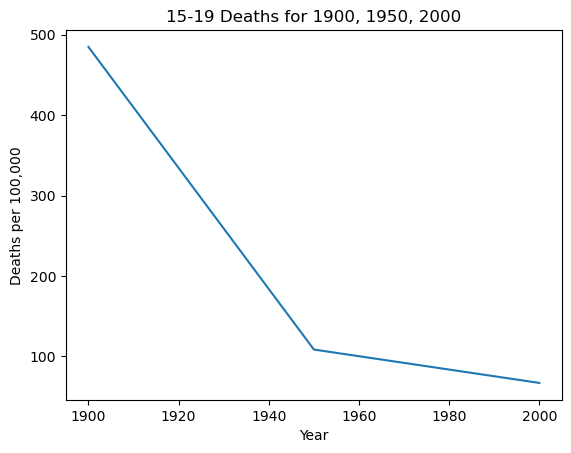

In [127]:
df = mortality_data[['Year', 'AgeGroup', 'DeathRate']]
df_years = df[(df['Year'] == 1900) | (df['Year'] == 1950) | (df['Year'] == 2000)]
df_15_19 = df_years[df_years['AgeGroup'] == '15-19 Years']
sns.lineplot(x='Year', y='DeathRate', data=df_15_19)
plt.title('15-19 Deaths for 1900, 1950, 2000')
plt.ylabel('Deaths per 100,000')
plt.show()

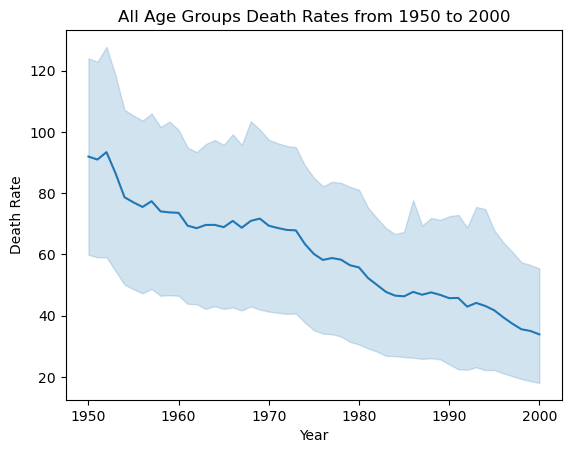

In [139]:
df = mortality_data[['Year', 'AgeGroup', 'DeathRate']]
df_years = df[(df['Year'] == 1900) | (df['Year'] == 1950) | (df['Year'] == 2000)]
df_1950_2000 = df[(df['Year'] >= 1950) & (df['Year'] <= 2000)]
sns.lineplot(x='Year', y='DeathRate', data=df_1950_2000)
plt.title('All Age Groups Death Rates from 1950 to 2000')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.show()

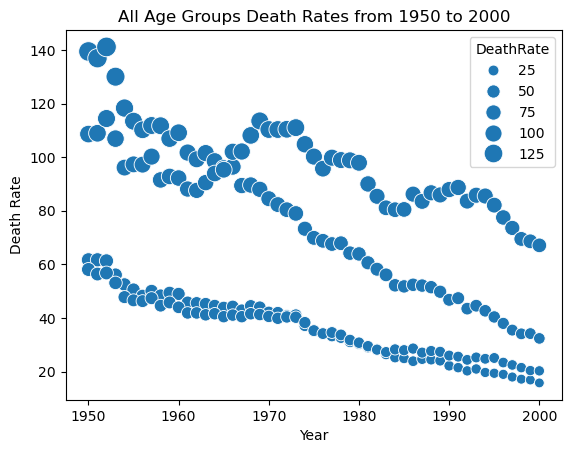

In [141]:
df = mortality_data[['Year', 'AgeGroup', 'DeathRate']]
df_years = df[(df['Year'] == 1900) | (df['Year'] == 1950) | (df['Year'] == 2000)]
df_1950_2000 = df[(df['Year'] >= 1950) & (df['Year'] <= 2000)]
sns.scatterplot(data=df_1950_2000, x='Year', y='DeathRate', size='DeathRate', sizes=(50, 200))
plt.title('All Age Groups Death Rates from 1950 to 2000')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.show()

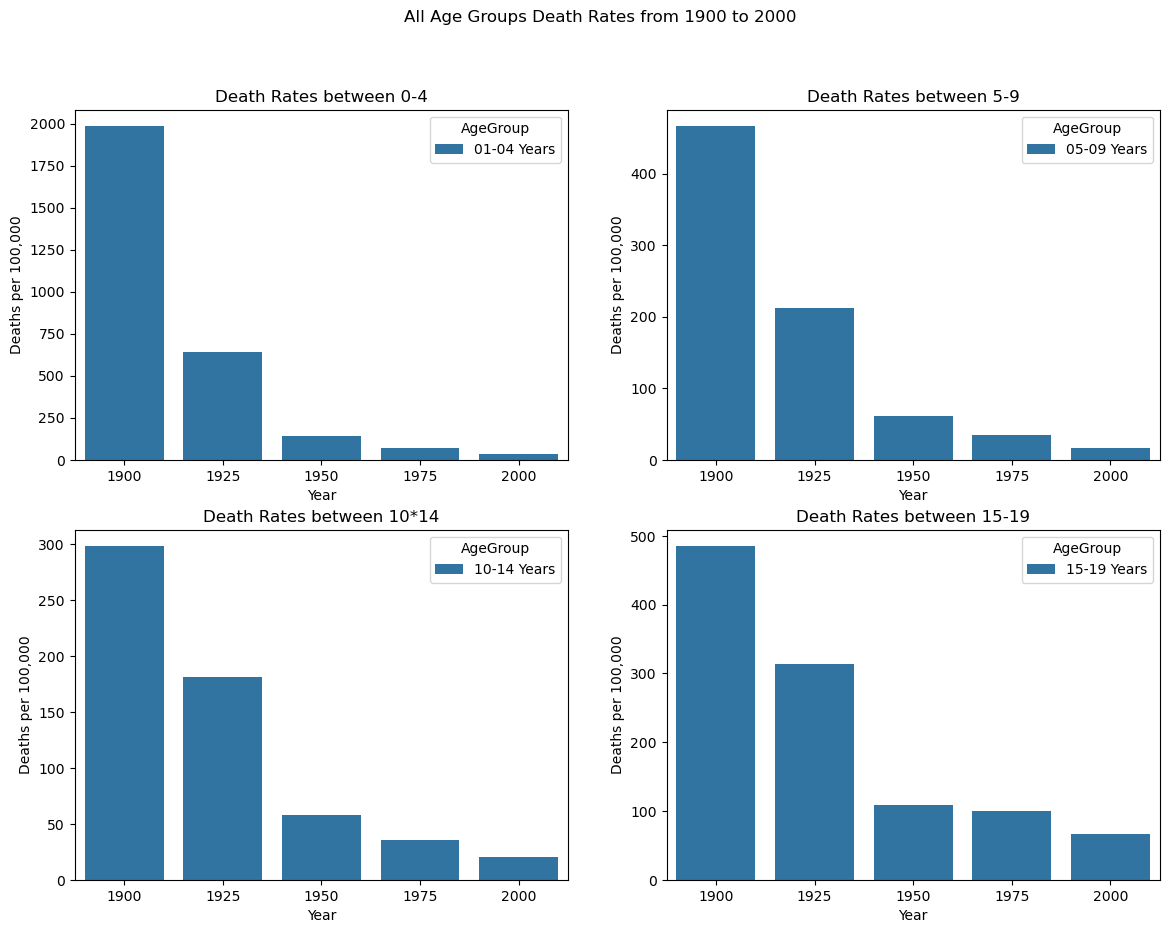

In [155]:

df = mortality_data[['Year', 'AgeGroup', 'DeathRate']]
df_years = df[(df['Year'] == 1900) |(df['Year'] == 1925) |  (df['Year'] == 1950) | (df['Year'] == 1975) | (df['Year'] == 2000)]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='Year', y='DeathRate', hue='AgeGroup', data=df_years[df_years['AgeGroup'] == '01-04 Years'], ax=axes[0, 0])
axes[0, 0].set_title('Death Rates between 0-4',)
axes[0, 0].set_ylabel('Deaths per 100,000')

sns.barplot(x='Year', y='DeathRate', hue='AgeGroup', data=df_years[df_years['AgeGroup'] == '05-09 Years'], ax=axes[0, 1])
axes[0, 1].set_title('Death Rates between 5-9')
axes[0, 1].set_ylabel('Deaths per 100,000')


sns.barplot(x='Year', y='DeathRate', hue='AgeGroup', data=df_years[df_years['AgeGroup'] == '10-14 Years'], ax=axes[1, 0])
axes[1, 0].set_title('Death Rates between 10*14')
axes[1, 0].set_ylabel('Deaths per 100,000')

sns.barplot(x='Year', y='DeathRate', hue='AgeGroup', data=df_years[df_years['AgeGroup'] == '15-19 Years'], ax=axes[1, 1])
axes[1, 1].set_title('Death Rates between 15-19')
axes[1, 1].set_ylabel('Deaths per 100,000')


fig.suptitle('All Age Groups Death Rates from 1900 to 2000')

plt.savefig('/Users/valentinadiamante/Downloads/python_analysis/exercises/barCharts.png', dpi=300)



plt.show()